In [6]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid, plot_contourf_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [17]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1998
last_year = 1999
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [81]:
IVT_objs_ICON_ERA5 = load_tracking_objects(input_path_ICON_ERA5,
                                      input_file_name_temp_ICON_ERA5,
                                      type_, first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ICON_ERA5,
                                      
                                     
                                      )
    
    

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_DRIVENBY_ERA5_remapped_3x/Object_container_1998-1999 exists. Loading...


In [18]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ERA5,
                                      
                                      )


/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1998-1999 exists. Loading...


Season.DJF
Season.MAM
Season.JJA
Season.SON


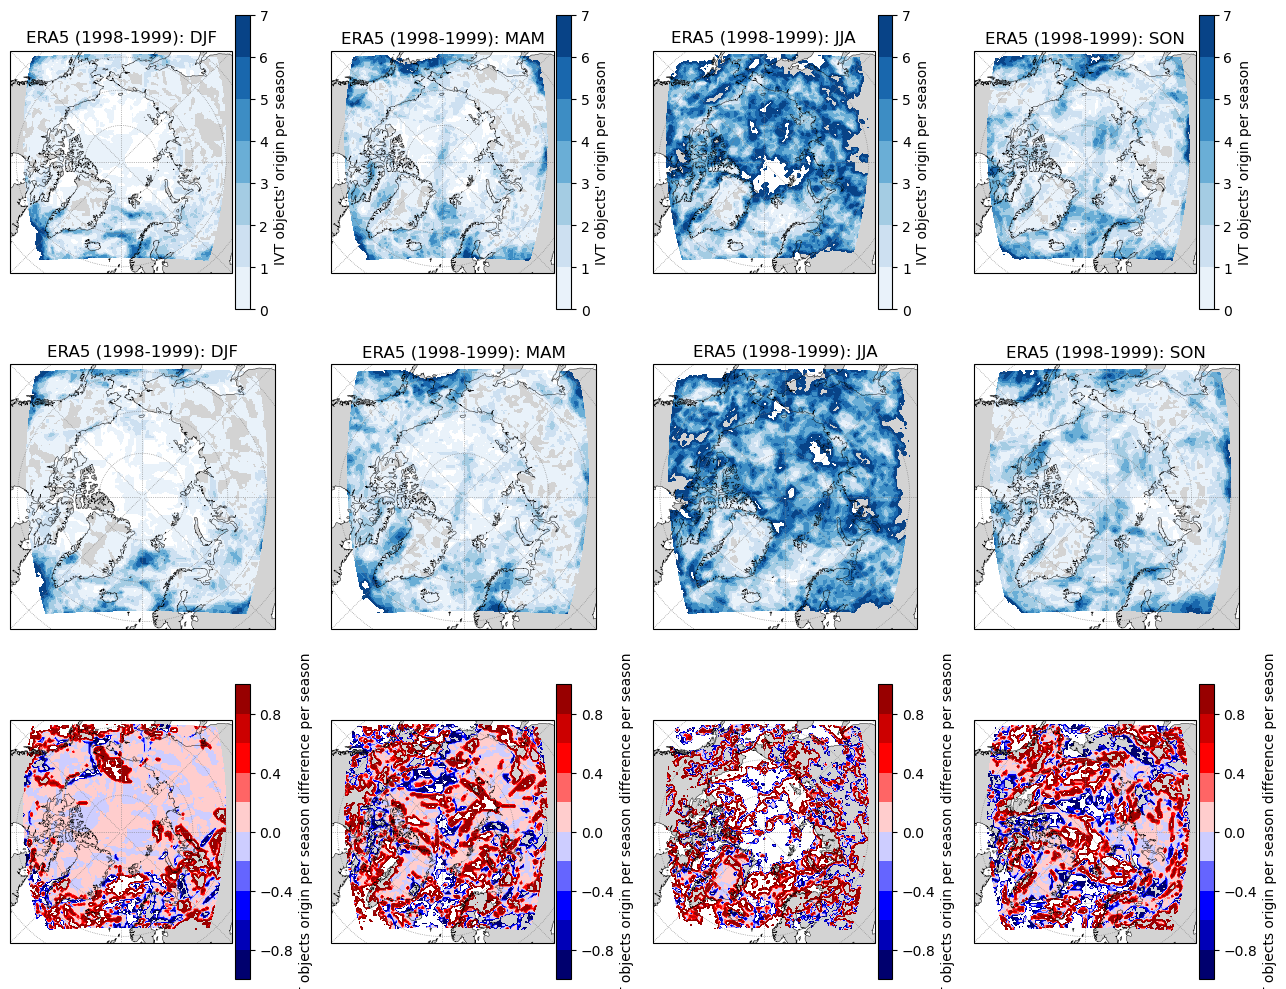

In [84]:
fig = plt.figure(figsize=(13,10))
subplts = (3,4)
levels=np.arange(0,8,1)
for i, season_ in enumerate(Season):
    print (season_)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).seltimesteps(slice(0,1))

    lon,lat,z_ERA5 = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z_ERA5= (z_ERA5/num_years)*1.0001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_ERA5, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5 ({first_year}-{last_year}): {season_.name}",
                                  cbar_label =  "IVT objects' origin per season",
                                   cbar=True
                                  )
    

    IVTobjs_sel_ICON_ERA5 = IVT_objs_ICON_ERA5.sel_season(season_).seltimesteps(slice(0,1))

    lon,lat,z_ICON_ERA5 = count_objs_grid_points(IVTobjs_sel_ICON_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z_ICON_ERA5= (z_ICON_ERA5/num_years)*1.0001


    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_ICON_ERA5, 
                                  fig=fig,
                                  index = i+4,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5 ({first_year}-{last_year}): {season_.name}",
                                  cbar_label =  "IVT objects' origin per season",
                                   cbar=False
                                  )
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_ICON_ERA5-z_ERA5, 
                                  fig=fig,
                                  index = i+8,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-1,1.1,0.2),
                                  #title=f"ERA5 minus ICON-ERA5:({first_year}-{last_year}): {season_.name}",
                                  cbar_label = " IVT objects origin per season difference per season",
                                   cbar=True
                                  )
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


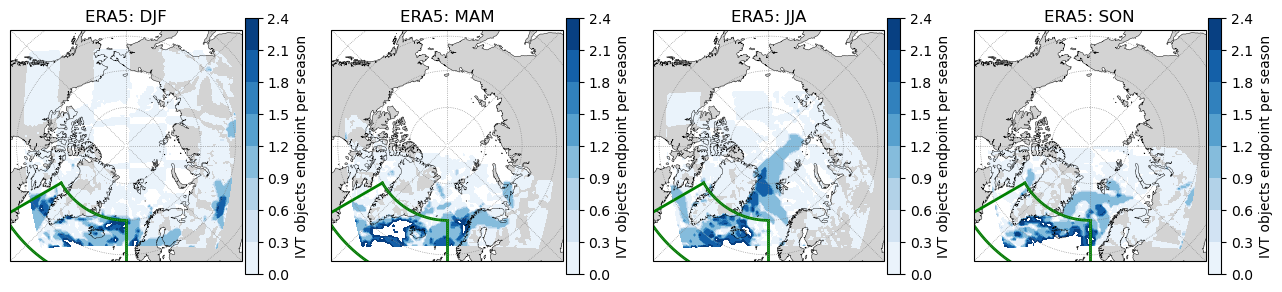

In [19]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,2.5,0.3)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.NORTH_ATLANTIC).seltimesteps(slice(-1,None))

    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=1)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects endpoint per season",
                                  plot_domains={Domains.NORTH_ATLANTIC : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()

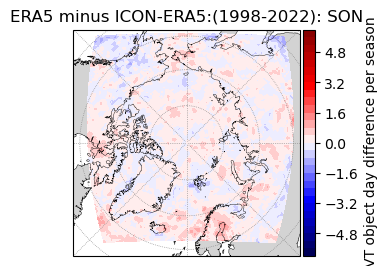

In [77]:
diff=z_ERA5-z_ICON_ERA5
diff2=-1*np.ones(diff.size)
fig = plt.figure(figsize=(20,10))
subplts = (3,4)
plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  diff, 
                                  fig=fig,
                                  index = 1,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-6,6.1,0.4),
                                  title=f"ERA5 minus ICON-ERA5:({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object day difference per season")

In [32]:
np.min(diff+4)

2.2914958333333333

Text(0, 0.5, 'Frequency')

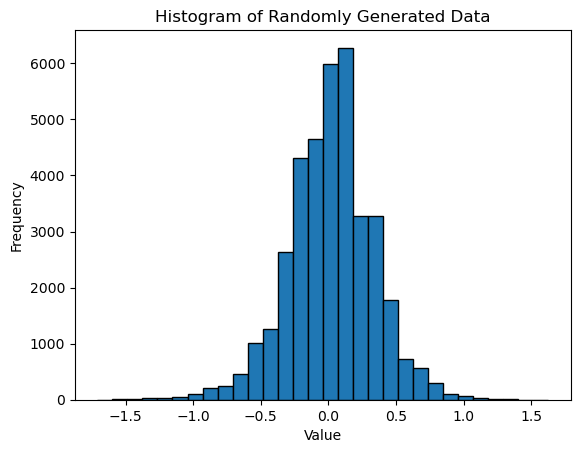

In [41]:
plt.hist(z_ERA5-z_ICON_ERA5, bins=30, edgecolor='black')
plt.title('Histogram of Randomly Generated Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate sample data
num_points = 100
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)
z = np.sin(4 * np.pi * x) * np.sin(4 * np.pi * y)

# Define a grid for interpolation
grid_x, grid_y = np.mgrid[0:1:200j, 0:1:200j]

# Interpolate using 'linear' scheme
grid_z_linear = griddata((x, y), z, (grid_x, grid_y), method='linear')

# Interpolate using 'cubic' scheme
grid_z_cubic = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Plotting the results


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate sample data
num_points = 100
x = lon
y = lat
z = z_ERA5

# Define a grid for interpolation
grid_x, grid_y = np.mgrid[np.min(lon):np.max(lon):100j, np.min(lat):np.max(lat):100j]

In [70]:
# Interpolate using 'linear' scheme
grid_z_linear = griddata((x, y), z, (grid_x, grid_y), method='linear')

# Interpolate using 'cubic' scheme
grid_z_cubic = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Plotting the results

In [61]:
grid_x.shape

(100, 100)

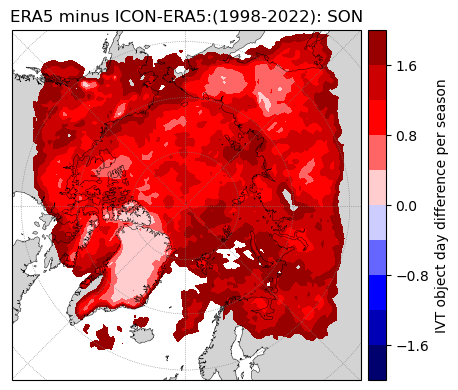

In [72]:
fig = plt.figure(figsize=(20,10))
subplts = (2,2)
plot_contourf_rotated_grid(grid_x,
                                  grid_y, 
                                  grid_z_cubic, 
                                  fig=fig,
                                  index = 1,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-2,2.1,0.4),
                                  title=f"ERA5 minus ICON-ERA5:({first_year}-{last_year}): {season_.name}",
                                  cbar_label = "IVT object day difference per season")

In [65]:
grid_z_linear

array([[-0.91675833, -1.29558308, -0.83341667, ...,  0.70840417,
         0.33126178,  0.29169583],
       [-1.39155283, -1.34356784, -1.09101854, ...,  0.40913157,
         0.17552353,  0.25255055],
       [-0.87003663, -0.51435799, -0.78290634, ...,  0.41586537,
         0.250025  ,  0.2348724 ],
       ...,
       [-0.3434684 , -0.76186211, -0.68357075, ..., -0.04503716,
        -0.110701  ,  0.1401651 ],
       [-0.63137911, -0.70251225, -0.44364534, ...,  0.08586561,
         0.01936436,  0.47605628],
       [ 0.16668174, -0.36030605, -0.73323812, ..., -0.15784325,
         0.60443704,  0.50005159]])